In [2]:
import matplotlib.pyplot as plt
%matplotlib tk
import matplotlib.animation as animation
import time
#libraries we need:
import mysql.connector as my_sql
import matplotlib.animation as animation 
import matplotlib.pyplot as plt 
import numpy as np 
global data
import scipy.signal
from scipy.signal import find_peaks


In [ ]:


fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
xar = []
yar = []

    
# Execute the SQL query to fetch real-time data
#my_cursor.execute("SELECT * FROM radar_sensor")    
#data = my_cursor.fetchall()

def animate(i,xar, yar):
    #pullData = open("sampleText.txt","r").read()
    #dataArray = pullData.split('\n')
    my_db = my_sql.connect(
        host="localhost",
        user="Arduino",
        passwd="ArduinoGetStarted.com",
        database="vital_signs")
    my_cursor = my_db.cursor()
    my_cursor.execute("SELECT * FROM radar_sensor")    
    data = my_cursor.fetchall()
    xar = []
    yar = []
    for row in data:
        xar.append(row[0]) #timestamp - id actually
        #print(row)
        yar.append(row[4]) #heartrate; row 4 = breathing rate
    ax1.clear()
    ax1.plot(xar,yar)
    #ax1.plot(yar)

#ani = animation.FuncAnimation(fig, animate, fargs=(xs, ys), interval=1000)
ani = animation.FuncAnimation(fig, animate, interval=1000)
#plt.show()

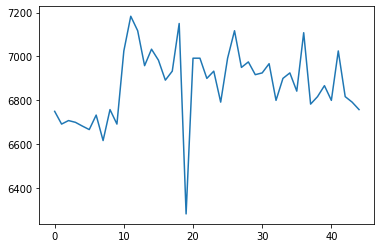

In [1]:
import matplotlib.pyplot as plt
y1= [-1167,-1092,-1158,-1117,-1183,-1167,-1133,-1192,-1175,-1300,-1250,-1033,-1217,-1233,-1367,-1125,-1800,-1333,-1667,-1367,-1442,-1233,-1125,-1317,-1092,-1300,-983,-1308,-1342,-1317,-1308,-1325,-1350,-1400,-1433,-1325,-975,-1200,-1850,-1442,-1442,-1150,-1325,-1283,-1400]
y2 = [6750,6692,6708,6700,6683,6667,6733,6617,6758,6692,7025,7183,7117,6958,7033,6983,6892,6933,7150,6283,6992,6992,6900,6933,6792,6992,7117,6950,6975,6917,6925,6967,6800,6900,6925,6842,7108,6783,6817,6867,6800,7025,6817,6792,6758]
plt.plot(y2)
plt.show()

In [ ]:
lastTimeStamp = 0
currentTimeStamp = 1;

'''

my_db = my_sql.connect(
        host="localhost",
        user="Arduino",
        passwd="ArduinoGetStarted.com",
        database="vital_signs")
my_cursor = my_db.cursor()
my_cursor.execute("SELECT * FROM radar_sensor")    
data = my_cursor.fetchall()
for row in data:
        xar.append(row[0]) #timestamp - id actually
        #print(row)
        yar.append(row[4]) #heartrate; row 4 = breathing rate
        
        avorite_languages = "JavaScript, Python, and Java"
'''        

accelData = row[1].split("_")
for i in range(0,len(accelData)):
    accelData[i] = int(accelData[i])


sos = signal.butter(2, 30, 'hp', fs=1000, output='sos')
accelFiltered = signal.sosfilt(sos, accelData)

peaks, _ = find_peaks(accelFiltered)
plt.plot(accelFiltered)
plt.plot(peaks, accelFiltered[peaks], "accelFiltered")
plt.plot(np.zeros_like(accelFiltered), "--", color="gray")
plt.show()